#### https://wikidocs.net/77993 
ㄴ 문서 내 02. 데이터 분석 라이브러리 관련

In [58]:
import pandas as pd

In [59]:
train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
train.shape

(891, 12)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
train['SexCategory'] = train.Sex.astype("category")

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  SexCategory  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.6+ KB


In [65]:
train.SexCategory.unique() ## -> 심지어 데이터 사용량도 매우 적다.

['male', 'female']
Categories (2, object): ['female', 'male']

In [66]:
pd.cut(train['Age'],3)

0        (0.34, 26.947]
1      (26.947, 53.473]
2        (0.34, 26.947]
3      (26.947, 53.473]
4      (26.947, 53.473]
             ...       
886    (26.947, 53.473]
887      (0.34, 26.947]
888                 NaN
889      (0.34, 26.947]
890    (26.947, 53.473]
Name: Age, Length: 891, dtype: category
Categories (3, interval[float64, right]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

In [67]:
pd.cut(train['Age'],3,labels=["Young","Middle","Old"])

0       Young
1      Middle
2       Young
3      Middle
4      Middle
        ...  
886    Middle
887     Young
888       NaN
889     Young
890    Middle
Name: Age, Length: 891, dtype: category
Categories (3, object): ['Young' < 'Middle' < 'Old']

In [68]:
train.Age.fillna(0,inplace=True)

In [69]:
train['AgeCategory'] = pd.cut(train['Age'],3,labels=["Young","Middle","Old"])
train.AgeCategory

0       Young
1      Middle
2       Young
3      Middle
4      Middle
        ...  
886    Middle
887     Young
888     Young
889     Young
890    Middle
Name: AgeCategory, Length: 891, dtype: category
Categories (3, object): ['Young' < 'Middle' < 'Old']

 ### 2가지 방법으로 각 카테고리 정수화하는 방법

In [71]:
# factorize를 이용하여 정수형으로 변경 
train["AgeCategoryCode1"] = pd.factorize(train.AgeCategory)[0] ## [0]은 뒤에 있는 데이터 정보 빼고 값만 가져오려는 것 
train.AgeCategoryCode1

0      0
1      1
2      0
3      1
4      1
      ..
886    1
887    0
888    0
889    0
890    1
Name: AgeCategoryCode1, Length: 891, dtype: int64

In [72]:
train["AgeCategoryCode2"] = train.AgeCategory.map({"Young":0,"Middle":1,"Old":2})
train.AgeCategoryCode2 = train.AgeCategoryCode2.astype(int)
train.AgeCategoryCode2

0      0
1      1
2      0
3      1
4      1
      ..
886    1
887    0
888    0
889    0
890    1
Name: AgeCategoryCode2, Length: 891, dtype: int64

### 결측

In [73]:
df = pd.DataFrame({
    '이름': ['조조', '조운', '주유'], 
    '통솔': [96, 91, 97], 
    '무력': [None, 97, 71], 
    '지력': [91, None, 96], 
    '정치': [94, None, 87], 
    '매력': [96, 81, None]
})


In [74]:
# 무력 100
df["무력"] = df["무력"].fillna(100)
# 정치 100
df["정치"].fillna(100, inplace=True)
# 매력 100
df.fillna({"매력":100}, inplace=True)


In [75]:
## 앞의값으로 채우기, 뒤의값으로 채우기도 가능하다

In [77]:
df.fillna(method='ffill',axis=1)

,이름,통솔,무력,지력,정치,매력
0,조조,96,100.0,91.0,94.0,96.0
1,조운,91,97.0,97.0,100.0,81.0
2,주유,97,71.0,96.0,87.0,100.0


In [78]:
df.fillna(method='bfill',axis=1)

,이름,통솔,무력,지력,정치,매력
0,조조,96,100.0,91.0,94.0,96.0
1,조운,91,97.0,100.0,100.0,81.0
2,주유,97,71.0,96.0,87.0,100.0


### Function - Loop / 반복문 처리

In [79]:
df = pd.DataFrame({
    '이름': ['조조', '조운', '주유'], 
    '통솔': [96, 91, 97], 
    '무력': [72, 97, 71], 
    '지력': [91, 76, 96], 
    '정치': [94, 65, 87], 
    '매력': [96, 81, 93]
})

In [80]:
df

,이름,통솔,무력,지력,정치,매력
0,조조,96,72,91,94,96
1,조운,91,97,76,65,81
2,주유,97,71,96,87,93


In [85]:
for index, row in df.iterrows():
    print(index)
    print(row)
    print("------")

0
이름    조조
통솔    96
무력    72
지력    91
정치    94
매력    96
Name: 0, dtype: object
------
1
이름    조운
통솔    91
무력    97
지력    76
정치    65
매력    81
Name: 1, dtype: object
------
2
이름    주유
통솔    97
무력    71
지력    96
정치    87
매력    93
Name: 2, dtype: object
------


In [86]:
for row in df.itertuples(): ## () 내에 Name도 지정할 수 있음 
    print(row)

Pandas(Index=0, 이름='조조', 통솔=96, 무력=72, 지력=91, 정치=94, 매력=96)
Pandas(Index=1, 이름='조운', 통솔=91, 무력=97, 지력=76, 정치=65, 매력=81)
Pandas(Index=2, 이름='주유', 통솔=97, 무력=71, 지력=96, 정치=87, 매력=93)


### Function - SQL
sqlalchemy 이용 시 데이터 프레임을 RDB처럼 이용할 수 있다

In [88]:
from sqlalchemy import create_engine

In [89]:
df = pd.DataFrame({
    '이름': ['조조', '조운', '주유'], 
    '통솔': [96, 91, 97], 
    '무력': [72, 97, 71], 
    '지력': [91, 76, 96], 
    '정치': [94, 65, 87], 
    '매력': [96, 81, 93]
})


In [90]:
engine = create_engine('sqlite://',echo=False)
df.to_sql('df',con=engine)
engine.execute("SELECT * from df").fetchall()

[(0, '조조', 96, 72, 91, 94, 96),
 (1, '조운', 91, 97, 76, 65, 81),
 (2, '주유', 97, 71, 96, 87, 93)]

### Function - groupby

In [91]:
import pandas as pd
import numpy as np

# class, year, month 기준의 임의의 데이터 생성 
df = pd.DataFrame({
    'class': [['A', 'B', 'C'][np.random.randint(0, 3)] for i in range(0, 10)], 
    'year':  [np.random.randint(2019, 2021) for i in range(0, 10)], 
    'month': [np.random.randint(5, 7) for i in range(0, 10)], 
    'val1':  [np.random.randint(10000, 20000) for i in range(0, 10)], 
    'val2':  [np.random.randint(100, 300) for i in range(0, 10)], 
    'val3':  [np.random.randint(1, 11) for i in range(0, 10)], 
})
df

,class,year,month,val1,val2,val3
0,B,2019,5,11439,167,4
1,B,2020,5,11580,156,4
2,C,2020,5,10555,238,2
3,B,2020,5,17952,287,3
4,B,2020,6,15967,163,8
5,A,2020,6,14990,134,1
6,C,2020,5,10602,256,6
7,C,2019,6,17427,197,4
8,A,2019,5,14871,264,2
9,B,2019,5,10773,184,4


In [93]:
df.groupby("class").count()

,year,month,val1,val2,val3
class,,,,,
A,2,2,2,2,2
B,5,5,5,5,5
C,3,3,3,3,3


In [94]:
grouped_df = df.groupby(["class","year","month"])

In [95]:
grouped_df.sum()

val1  val2  val3
class year month                   
A     2019 5      14871   264     2
      2020 6      14990   134     1
B     2019 5      22212   351     8
      2020 5      29532   443     7
           6      15967   163     8
C     2019 6      17427   197     4
      2020 5      21157   494     8

In [102]:
f_grouped_df = df.groupby(lambda x: x//2)  ## 두줄씩 합쳐진 것 같다 
f_grouped_df.sum()

,year,month,val1,val2,val3
0,4039,10,23019,323,8
1,4040,10,28507,525,5
2,4040,12,30957,297,9
3,4039,11,28029,453,10
4,4038,10,25644,448,6


In [106]:
df.agg(['sum','min','count']) ## -> 이런식으로 여러개의 집계 결과를 한번에 사용할 수도 있다. 

,class,year,month,val1,val2,val3
sum,BBCBBACCAB,20196,53,136156,2046,38
min,A,2019,5,10555,134,1
count,10,10,10,10,10,10


In [107]:
grouped_df.agg(lambda x: x.max())

val1  val2  val3
class year month                   
A     2019 5      14871   264     2
      2020 6      14990   134     1
B     2019 5      11439   184     4
      2020 5      17952   287     4
           6      15967   163     8
C     2019 6      17427   197     4
      2020 5      10602   256     6

In [109]:
grouped_df.agg(lambda x: x.min())

val1  val2  val3
class year month                   
A     2019 5      14871   264     2
      2020 6      14990   134     1
B     2019 5      10773   167     4
      2020 5      11580   156     3
           6      15967   163     8
C     2019 6      17427   197     4
      2020 5      10555   238     2

In [112]:
grouped_df.agg([('col1','min'),('col2','max')])

val1        val2      val3     
                   col1   col2 col1 col2 col1 col2
class year month                                  
A     2019 5      14871  14871  264  264    2    2
      2020 6      14990  14990  134  134    1    1
B     2019 5      10773  11439  167  184    4    4
      2020 5      11580  17952  156  287    3    4
           6      15967  15967  163  163    8    8
C     2019 6      17427  17427  197  197    4    4
      2020 5      10555  10602  238  256    2    6

In [113]:
grouped_df.agg({'val1':'min', 'val2':'max', 'val3': ['min', 'max'] })

val1 val2 val3    
                    min  max  min max
class year month                     
A     2019 5      14871  264    2   2
      2020 6      14990  134    1   1
B     2019 5      10773  184    4   4
      2020 5      11580  287    3   4
           6      15967  163    8   8
C     2019 6      17427  197    4   4
      2020 5      10555  256    2   6

### Function - General function

In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCategory,AgeCategory,AgeCategoryCode1,AgeCategoryCode2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Young,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Middle,1,1


In [119]:
pd.crosstab(train['Sex'], train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [120]:
pd.crosstab(train['Sex'], train['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [121]:
pd.crosstab(train['Sex'], train['Survived'],values=train['Survived'],aggfunc=sum) ## 0의 합은 0이니까 

Survived,0,1
Sex,,
female,0,233
male,0,109


In [122]:
pd.qcut(train['Age'],4)

0        (6.0, 24.0]
1       (35.0, 80.0]
2       (24.0, 35.0]
3       (24.0, 35.0]
4       (24.0, 35.0]
           ...      
886     (24.0, 35.0]
887      (6.0, 24.0]
888    (-0.001, 6.0]
889     (24.0, 35.0]
890     (24.0, 35.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 6.0] < (6.0, 24.0] < (24.0, 35.0] < (35.0, 80.0]]

In [127]:
pd.qcut(train['Age'],4, labels=['Baby','Young','Middle','Old'])

<bound method NDFrame.head of 0       Young
1         Old
2      Middle
3      Middle
4      Middle
        ...  
886    Middle
887     Young
888      Baby
889    Middle
890    Middle
Name: Age, Length: 891, dtype: category
Categories (4, object): ['Baby' < 'Young' < 'Middle' < 'Old']>

In [128]:
import pandas as pd

# 시리즈 생성후 머지.
# 기존 인덱스가 그대로 사용 됨 
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [129]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [130]:
# 테스트용 데이터 프레임 생성. 칼럼이 다름 
df1 = pd.DataFrame({"col1":["a", "b"], "col2":[1, 2]})
df2 = pd.DataFrame({"col3":["c", "d"], "col4":[3, 4]})

# 칼럼 이름 기준으로 머지 
# 데이터가 없는 칼럼은 NaN으로 입력 
pd.concat([df1, df2], sort=False)

,col1,col2,col3,col4
0,a,1.0,NaN,NaN
1,b,2.0,NaN,NaN
0,NaN,NaN,c,3.0
1,NaN,NaN,d,4.0


In [131]:
pd.concat([df1, df2], axis=1)

,col1,col2,col3,col4
0,a,1,c,3
1,b,2,d,4


In [132]:
# 테스트용 데이터 프레임 생성. 칼럼이 동일함 
df3 = pd.DataFrame({"col1":["a", "b"], "col2":[1, 2]})
df4 = pd.DataFrame({"col1":["c", "d"], "col2":[3, 4]})

# 칼럼이름 기준으로 머지 
pd.concat([df3, df4])

,col1,col2
0,a,1
1,b,2
0,c,3
1,d,4


In [133]:
# 열 기준으로 머지 
pd.concat([df3, df4], axis = 1)

,col1,col2,col1,col2
0,a,1,c,3
1,b,2,d,4


In [134]:
# 인덱스 신규로 생성 머지 
pd.concat([df3, df4], ignore_index = True)

,col1,col2
0,a,1
1,b,2
2,c,3
3,d,4


### Matplot

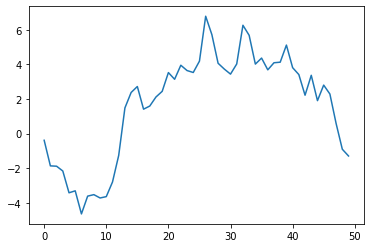

In [1]:
# 매직 커맨드(주피터 노트북용)
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 

# 단일 차트 작성 
plt.plot(np.random.randn(50).cumsum()) ## cumsum()은 누적합이라는 뜻

#### add_subplot

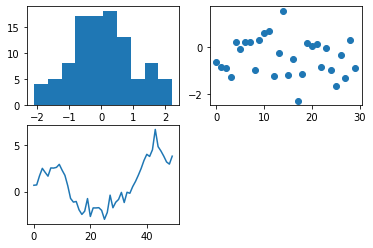

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) # 차트 1
ax2 = fig.add_subplot(2, 2, 2) # 차트 2
ax3 = fig.add_subplot(2, 2, 3) # 차트 3

ax1.hist(np.random.randn(100))
ax2.scatter(np.arange(30),np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum())

plt.show()

#### subplots

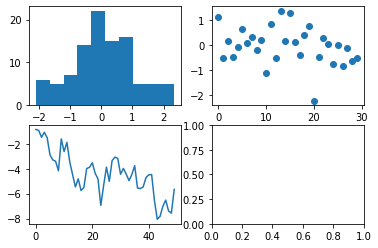

In [9]:
fig, axes = plt.subplots(2,2) ## -> 
axes[0][0].hist(np.random.randn(100))
axes[0][1].scatter(np.arange(30),np.random.randn(30))
axes[1][0].plot(np.random.randn(50).cumsum())
plt.show()

ValueError: Wedge sizes 'x' must be non negative values

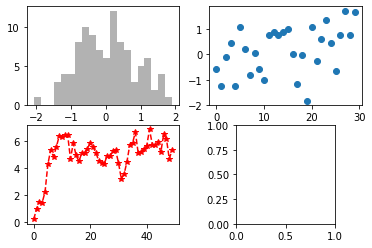

In [22]:
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
axes[0][1].scatter(np.arange(30), np.random.randn(30))
axes[1][0].plot(np.random.randn(50).cumsum(), linestyle='--', color='r', marker='*')
axes[1][1].pie(np.random.randn(50).cumsum())
plt.show()

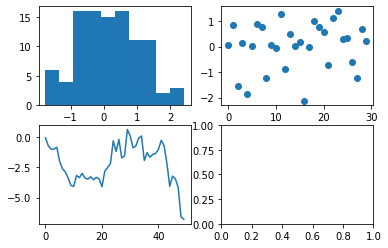

In [28]:
fig, axes = plt.subplots(2, 2)
axes[0][0].hist(np.random.randn(100))
axes[0][1].scatter(np.arange(30), np.random.randn(30))
axes[1][0].plot(np.random.randn(50).cumsum())
#axes[1][1].pie(np.random.randn(50).cumsum())  -> 에러나고있는데...
plt.show()

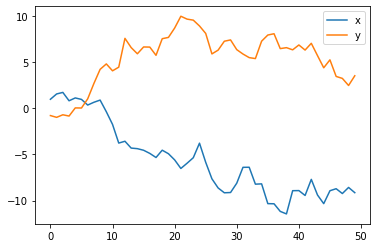

In [30]:
plt.plot(np.random.randn(50).cumsum(), label='x')
plt.plot(np.random.randn(50).cumsum(), label='y')
plt.legend(loc='best') ## 범례 추가 법 

In [32]:
import pandas as pd

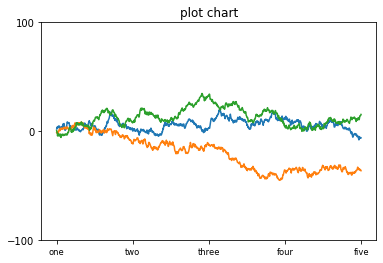

In [33]:
# x축 값 
ax = pd.Series(np.random.randn(1000).cumsum()).plot()
ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_title('plot chart')

# x축 레이블 설정
ax = pd.Series(np.random.randn(1000).cumsum()).plot()
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

# y축 설정 
ax = pd.Series(np.random.randn(1000).cumsum()).plot()
ax.set_yticks([-100, 0, 100])